<a href="https://colab.research.google.com/github/XiadaniCue/Simulaci-n-1/blob/main/Otras_Aplicaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ejercicios de Aplicación**

**Ejercicio 5.3**

Una compañía de renta de autos, está tratando de determinar el número óptimo de autos a comprar. El costo promedio anual de un auto es de $\$75,000$. Además, esta compañía a recopilado las siguientes probabilidades de operación:

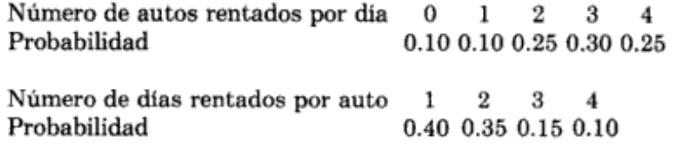

Si la renta diaria de un auto es de $\$350$, el costo de no tener un auto disponible cuando se esta solicitando es de $\$200$ y el costo de tener un carro ocioso(sin ocupar) durante un día es de $\$50$. ¿Cúal es la cantidad de autos que debería comprar la compañía? (Asuma que un auto que se renta por un día esta disponible al día siguiente. También, asuma 365 días de operación al año).

**Sol.**

Calculamos primero por el método de Transformada inversa las el número de autos rentados por día y el número de días rentados.

Nuestras Tablas nos quedan de la siguiente manera:

$$Número~de~autos~rentados~por~un~día$$
$$Si~0.00≤R<0.10,~entonces~x=0$$
$$Si~0.10≤R<0.20,~entonces~x=1$$
$$Si~0.20≤R<0.45,~entonces~x=2$$
$$Si~0.45≤R<0.75,~entonces~x=3$$
$$Si~0.75≤R<1.00,~entonces~x=4$$

Para la siguente tabla:

$${Número~de~días~rentados~por~auto}$$
$$Si~0.00≤R<0.40,~entonces~x=1$$
$$Si~0.40≤R<0.75,~entonces~x=2$$
$$Si~0.75≤R<0.90,~entonces~x=3$$
$$Si~0.90≤R<1.00,~entonces~x=4$$


Ahora calcularemos el ingreso anual por auto. Sabemos que la renta diaria de un auto es de $\$350$ y se trabajan los 365 días del año. Nos queda entonces:

$$Ingreso~anual~por~auto =\$350~x~365~días~= \$127,750$$

Si se rentará un auto por día, anualmente se obtendría $\$127,750$ y el costo por auto es $\$75,000$, entonces nuestro beneficio esperado sería de: $\$127,750 - \$75,000 = \$52,750$

Para visualizar mejor nuestros datos haremos una tabla de probabilidades:

In [140]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from tabulate import tabulate
from IPython.display import display
import pandas as pd

In [141]:
#Hacemos nuestra tabla de probabilidades cruzadas

autos=['.',0,1,2,3,4]
p_a=['P(A) y P(D)',0.10,0.10,0.25,0.30,0.25]
d_1=[0.40,0.0,0.04,0.10,0.12,0.10]
d_2=[0.35,0.0, 0.035, 0.0875, 0.105, 0.0875]
d_3=[0.15,0.0,0.015,0.0375,0.045,0.375]
d_4=[0.10,0.0,0.01,0.025,0.03,0.025]
#Escribimos el contenido de la tabla
tabla=pd.DataFrame((list(zip(autos, p_a,d_1,d_2,d_3,d_4))), columns=["Autos y días rentados", ".", "1","2","3","4"])

#Imprimimos la tabla y le damos formato
dataframe = pd.DataFrame(tabla)
display(dataframe)


,Autos y días rentados,.,1,2,3,4
0,.,P(A) y P(D),0.40,0.3500,0.1500,0.100
1,0,0.1,0.00,0.0000,0.0000,0.000
2,1,0.1,0.04,0.0350,0.0150,0.010
3,2,0.25,0.10,0.0875,0.0375,0.025
4,3,0.3,0.12,0.1050,0.0450,0.030
5,4,0.25,0.10,0.0875,0.3750,0.025


In [214]:
renta=350 #Renta por día de un auto

#Listas para guardar valores
list_autos=[] #Autos rentados por día
list_dias=[] #Días rentados
list_uso=[] #Días en uso
list_prob=[] #Probabilidad
list_beneficio=[] #Beneficio
list_benesp=[] #Beneficio Esperado

def sim(n):
  #Hacemos contadore para calcular la probabilidad
  c0=0
  c1=0
  c2=0
  c3=0
  c4=0
  cc1=0
  cc2=0
  cc3=0
  cc4=0
  total_dias=0
  total=0

  for k in range(n):
    #Generamos números aleatorios N(0,1)
    U1=rnd.random() #Para la cantidad de autos rentados
    U2=rnd.random() #Para la cantidad de días rentados

    #Con ayuda de la transformada inversa calculamos los autos rentado por días
    if 0.00<=U1<0.10:
      x_a=0 #0 autos rentados por día
      U1=0.10 #Probabilidad
      list_autos.append(x_a) #Se guarda en la lista
      c0=c0+1 #Se genera el contador
    elif 0.10<=U1<0.20:
      x_a=1
      U1=0.10
      list_autos.append(x_a)
      c1=c1+1
    elif 0.20<=U1<0.45:
      x_a=2
      U1=0.25
      list_autos.append(x_a)
      c2=c2+1
    elif 0.45<=U1<0.75:
      x_a=3
      U1=0.30
      list_autos.append(x_a)
      c3=c3+1
    elif 0.75<=U1<1.00:
      x_a=4
      U1=0.25
      list_autos.append(x_a)
      c4=c4+1

    #Probabilidad de autos rentado por día
    prob0=c0/n
    prob1=c1/n
    prob2=c2/n
    prob3=c3/n
    prob4=c4/n

    #Con ayuda de la transformada inversa calculamos los días rentados
    if 0.00<=U2<0.40:
      x_d=1
      U2=0.40
      list_dias.append(x_d)
      cc1=cc1+1
    elif 0.40<=U2<0.75:
      x_d=2
      U2=0.35
      list_dias.append(x_d)
      cc2=cc2+1
    elif 0.75<=U2<0.90:
      x_d=3
      U2=0.15
      list_dias.append(x_d)
      cc3=cc3+1
    elif 0.90<=U2<1.00:
      x_d=4
      U2=0.10
      list_dias.append(x_d)
      cc4=cc4+1

    #Calculamos su probabilidad
    pro1=cc1/n
    pro2=cc2/n
    pro3=cc3/n
    pro4=cc4/n

    if x_a>0:
      uso=x_a*x_d #Calculamos el tiempo qué estarás ocupados los autos
      list_uso.append(uso) #Se guarda en una lista
      beneficio=renta*uso #Multiplicamos el costo por día de la renta del auto
      list_beneficio.append(beneficio) #Se guarda en una lista
    elif x_a==0:
      uso=0
      list_uso.append(uso)
      beneficio=-50 #Si no se solicitan carros, tenemo una perdida de $50
      list_beneficio.append(beneficio)

    u=beneficio
    total=total+beneficio #Total aproximado de los beneficios

    benesp=U1*U2*renta #Se calcula en beneficio esperado
    list_benesp.append(benesp)


    d=uso
    total_dias=total_dias+uso #Total aproximado de los días que se ocupan
    prob=U2*U1
    list_prob.append(prob)

  multa0=50*c0
  multa1=50*c1
  print('carros ociosos: $', multa0+multa1)

  multa3=200*c3
  multa4=200*c4
  print('carros no disponibles: $', multa3+multa4)
  print('P(A)',prob0, prob1, prob2, prob3, prob4)
  print('P(D)',pro1, pro2, pro3, pro4)
  print('Total de días:',total_dias)
  print('Beneficio: $',total)

  return prob0, prob1, prob2, prob3, prob4, pro1, pro2, pro3, pro4, total_dias, total



In [215]:
sim(65)

carros ociosos: $ 650
carros no disponibles: $ 7600
P(A) 0.1076923076923077 0.09230769230769231 0.2153846153846154 0.3230769230769231 0.26153846153846155
P(D) 0.36923076923076925 0.35384615384615387 0.15384615384615385 0.12307692307692308
Total de días: 326
Beneficio: $ 113750


(0.1076923076923077,
 0.09230769230769231,
 0.2153846153846154,
 0.3230769230769231,
 0.26153846153846155,
 0.36923076923076925,
 0.35384615384615387,
 0.15384615384615385,
 0.12307692307692308,
 326,
 113750)

In [193]:
tabla=pd.DataFrame((list(zip(list_autos, list_dias, list_uso, list_prob, list_beneficio, list_benesp))), columns=["Autos rentados por día","Días rentados", "Días en uso","Probablilidad del suceso","Beneficio", "Beneficio esperado"])

#Imprimimos la tabla y le damos formato
dataframe = pd.DataFrame(tabla)
display(dataframe)

,Autos rentados por día,Días rentados,Días en uso,Probablilidad del suceso,Beneficio,Beneficio esperado
0,1,3,3,0.0150,1050,5.250
1,2,2,4,0.0875,1400,30.625
2,3,2,6,0.1050,2100,36.750
3,2,1,2,0.1000,700,35.000
4,4,3,12,0.0375,4200,13.125
...,...,...,...,...,...,...
125,2,2,4,0.0875,1400,30.625
126,0,2,0,0.0350,-50,12.250
127,1,4,4,0.0100,1400,3.500
128,2,1,2,0.1000,700,35.000


Con el calculo aproximado de las probabilidades:
Existe una mayor probabilidad de que por día me soliciten 3 o 2 carros al día y existe una mayor probabilidad de que lo renten 1 o 2 días

Por lo tanto, lo mas recomendable es comprar 2 carros, buscando un beneficio esprado de:
$$\$350~x~2~carros=\$700$$
$$\$700~x~365~días=\$255,500$$

El costo de los 2 carros:
$$\$75,000~x~2~carros=\$150,000$$

Entonces el beficio sería de:
$$\$255,500-\$150,000=\$105,500$$

Le restamos el costo por carros ocioso o si no hay disponibles:
$$\$650+\$7600=\$8,250$$

El Beneficio sería de:
$$\$105,500-\$8,250=\$97,250$$



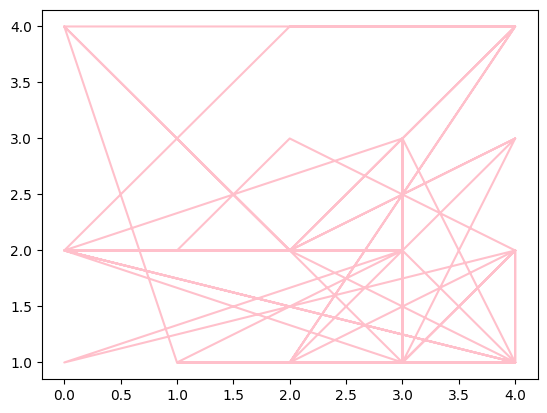

In [216]:
#Generamos nuestra gràfica

fig, ax = plt.subplots()
ax.plot(list_autos, list_dias, color="pink")
plt.show()